# Figure 4: Using mosaic reference data versus the mono-source reference. 
(A) UMAP colored by the mean accuracy achieved on the mosaic references subtracted by the mean accuracy achieved on the mono-source references
when using the weighted bootstrapping approach
Distribution of the accuracy (B) and precision (C) for the mosaic (colored boxplots, see Methods) for the weighted bootstrapping-based approach. The initial performance on the full refnerence is shown as a comparison (black dot).

In [1]:
source("../Scripts/functions.R")
source("../Scripts/visulizations.r")
library("RColorBrewer")
library(ggplot2)
library(dplyr)
library(purrr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
celltypes = c("Cytotoxic T cell", "CD4+ T cell", "CD14+ monocyte", "B cell", "Megakaryocyte",
              "Natural killer cell", "CD16+ monocyte", "Dendritic cell",
              "Plasmacytoid dendritic cell")
coi <- c("Cytotoxic T cell", "Dendritic cell", "Plasmacytoid dendritic cell" ) # cell types of interest
methods <- c("Seurat",  "SingleR","CellID", "SingleCellNet", "ItClust")

colors <-brewer.pal(length(celltypes), "Paired")
names(colors) <- celltypes

In [3]:
umapdata <- read.csv("../Results_old//Files/umap_data.csv")
expressiondata_file="../Data/Fulldata/PBMC_Query/data.csv"
bootstrap_weighted <- read.csv("../Results_old/Files/summary_mosaic.csv")

rownames(umapdata) <- umapdata$id

In [4]:
umapdata[is.na(umapdata)] <- 0

In [5]:
dif <- do.call(cbind, lapply(methods, function(method) umapdata[, paste(sep="_", "mosaic", method)] - umapdata[, paste(sep="_", "mono", method)]))
colnames(dif) <- paste(sep="_", "difference", methods)
umapdata <- cbind(umapdata, dif)
head(umapdata)

,id,class_,tech,mosaic_CellID,mosaic_ItClust,mosaic_Seurat,mosaic_SingleCellNet,mosaic_SingleR,mono_CellID,mono_ItClust,⋯,fullPred_CellID,fullPred_Seurat,fullPred_SingleCellNet,fullPred_SingleR,fullPred_ItClust,difference_Seurat,difference_SingleR,difference_CellID,difference_SingleCellNet,difference_ItClust
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
pbmc2_10X_V2_AAACCTGAGATGGGTC,pbmc2_10X_V2_AAACCTGAGATGGGTC,B cell,10x,1.00,1.00,1.00,1.00,1,1.00,1.00,⋯,B cell,B cell,B cell,B cell,B cell,0.00,0.0,0.00,0.00,0.0
pbmc2_10X_V2_AAACCTGAGCGTAATA,pbmc2_10X_V2_AAACCTGAGCGTAATA,B cell,10x,1.00,1.00,1.00,1.00,1,1.00,1.00,⋯,B cell,B cell,B cell,B cell,B cell,0.00,0.0,0.00,0.00,0.0
pbmc2_10X_V2_AAACCTGAGCTAGGCA,pbmc2_10X_V2_AAACCTGAGCTAGGCA,Cytotoxic T cell,10x,0.00,1.00,0.05,1.00,0,0.00,1.00,⋯,CD4+ T cell,Natural killer cell,Cytotoxic T cell,Natural killer cell,Cytotoxic T cell,-0.05,-0.7,0.00,0.10,0.0
pbmc2_10X_V2_AAACCTGAGGGTCTCC,pbmc2_10X_V2_AAACCTGAGGGTCTCC,Dendritic cell,10x,0.20,0.00,0.95,0.00,1,0.45,1.00,⋯,CD14+ monocyte,CD14+ monocyte,CD14+ monocyte,Dendritic cell,CD14+ monocyte,0.10,0.0,-0.25,-1.00,-1.0
pbmc2_10X_V2_AAACCTGGTCCGAACC,pbmc2_10X_V2_AAACCTGGTCCGAACC,CD4+ T cell,10x,0.95,0.75,0.20,0.05,1,1.00,0.15,⋯,CD4+ T cell,Cytotoxic T cell,CD4+ T cell,CD4+ T cell,Cytotoxic T cell,0.15,0.0,-0.05,-0.95,0.6
pbmc2_10X_V2_AAACCTGTCGTCCGTT,pbmc2_10X_V2_AAACCTGTCGTCCGTT,CD4+ T cell,10x,0.00,0.95,1.00,1.00,1,0.45,0.45,⋯,Cytotoxic T cell,CD4+ T cell,CD4+ T cell,CD4+ T cell,Cytotoxic T cell,0.00,0.0,-0.45,0.00,0.5


In [6]:
umap <- prepare_umap(file = expressiondata_file, meta_data = umapdata, split = "tech")


Warning message in data.table::fread(data, sep = ",", verbose = F):
“Detected 10910 column names but the data has 10911 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”


[1] 500
[1] "...."
[1] "Scaling..."


Warning message:
“Argument 'center' should be of the same length as number of rows of 'x'. Use of a scalar value is deprecated: 1 != 500”


[1] "create seurat object...."
[1] "Set assay...."
[1] "PCA...."
[1] "Get UMAP..."


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

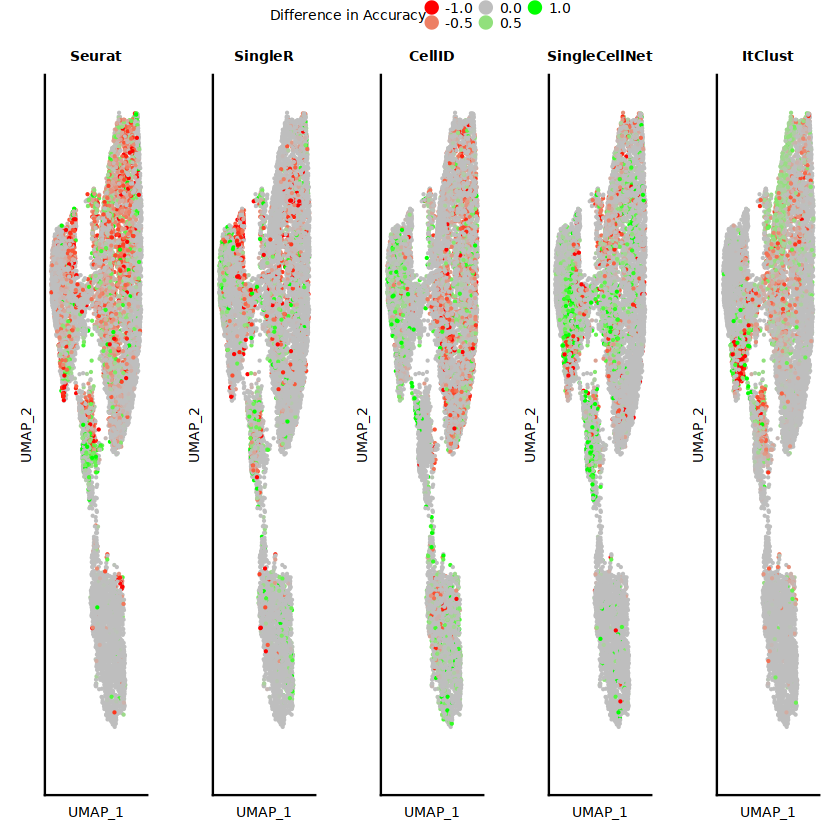

In [7]:
plot_difference <- function(data,groups, split=NULL,nrow=1, ncol=1, cells=NULL, return_plotlist=FALSE,
                          legend_ncol=3, title=""){

    umaps <- lapply(groups, function(method) Seurat::FeaturePlot(data, reduction="umap", 
                                                                 split.by=split,
                                                                 features=method) +
                    labs(title=title, color= "Difference in Accuracy")+ 
                    theme(axis.text=element_blank(), axis.title=element_text(size=8), axis.ticks=element_blank(),
                          plot.title=element_text(size=8),
                          legend.text=element_text(size=8), legend.title=element_text(size=8),
                          legend.key.size = unit(0, 'lines'),
                         legend.justification = "center")+
                    guides(color = guide_legend(ncol = legend_ncol, override.aes = list(size=3)))+ lims(color=c(-1,1))+ 
                    scale_colour_gradient2(low ="red",mid = "grey",high = "green",midpoint = 0) 
                   ) 
                   
    names(umaps) <- groups
    if(return_plotlist)return(umaps)
    #plot <- ggpubr::ggarrange(plotlist=umaps, common.legend = F, nrow=nrow, ncol=ncol)
    return(umaps)
}                    
 


plots <- plot_difference(umap, c(paste(sep="_", "difference",methods)), NULL,
                     1,1, legend_ncol = 3) 
names(plots) <- methods

plots <- lapply(seq(1,length(methods),1) , function(n) plots[[n]] +
                labs(title= methods[n]))
                  
f3a <- ggpubr::ggarrange(plotlist = plots, font.label = list(size = 15),
                         common.legend = T, legend = "top", ncol=5, nrow=1)
f3a


In [8]:
bootstrap_weighted$full_precision[is.na(bootstrap_weighted$full_precision)] <- 0
plot_accuracy <- get_violin_plot(bootstrap_weighted, colors, celltypes,
                                 methods, "", "Accuracy", colors)
plot_precision <- get_violin_plot(bootstrap_weighted, colors, celltypes,
                                  methods,"", "Precision", colors)


In [9]:
min(bootstrap_weighted$full_precision)

[1] 0

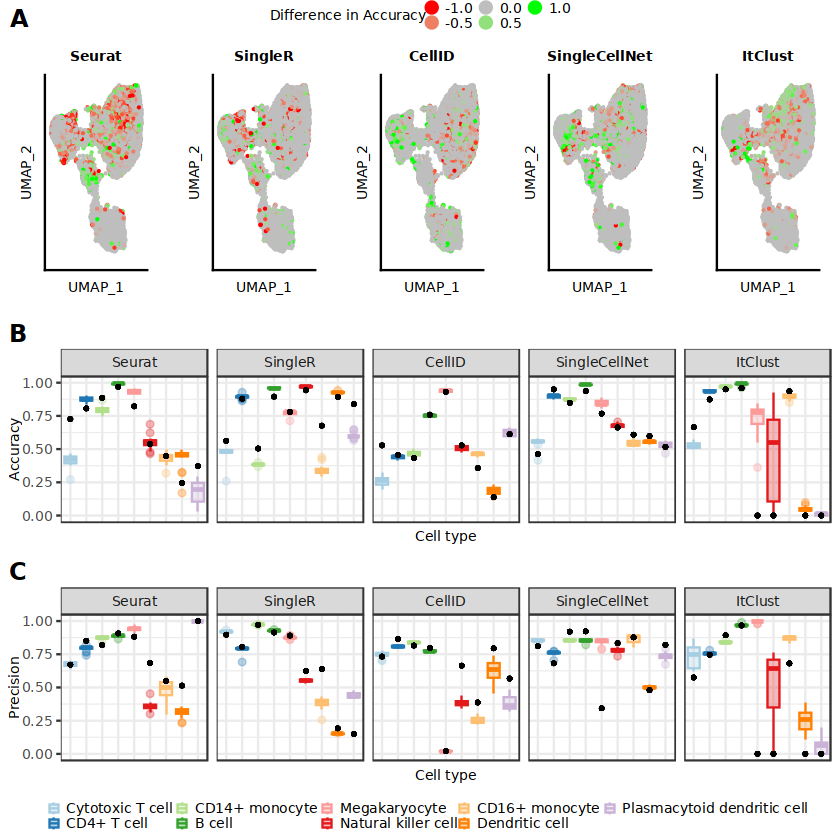

In [10]:
f3bc <- ggpubr::ggarrange(plot_accuracy,plot_precision, nrow=2, ncol=1,
                          labels= c("B", "C"),
                        common.legend=T, legend="bottom")

f3 <- ggpubr::ggarrange(f3a, f3bc, nrow=2, ncol=1, labels= c("A"),
                        common.legend=F, heights=c(1.2, 2))
f3

In [11]:
ggsave(
  "../Results/Figures/F4_PBMC_mosaic.eps",
  plot = f3,
  device = "eps",
  path = NULL,
  scale = 1,
  width = 180,
  height = 125,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“semi-transparency is not supported on this device: reported only once per page”


In [12]:
ggsave(
  "../Results/Figures/F4_PBMC_mosaic.pdf",
  plot = f3,
  device = "pdf",
  path = NULL,
  scale = 1,
  width = 180,
  height = 125,
  units = "mm",
  dpi = 300,
  limitsize = TRUE,
  bg = NULL
)